# Objective :

        Predict chances of admit for students. 
        Make a tree using decision tree algorithm
        predict accuray of the model.
        give best decision tree using grid search.

# Step 1 :  Import Library and Dataset

In [2]:
import pandas as pd
import numpy as np

In [61]:
# Read the data in
new = pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\Assessment DT RF\5 Decision Tree + Random Forest + Ensemble Techniques\admission.csv")

In [62]:
new.head(5)    

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [63]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


<AxesSubplot:>

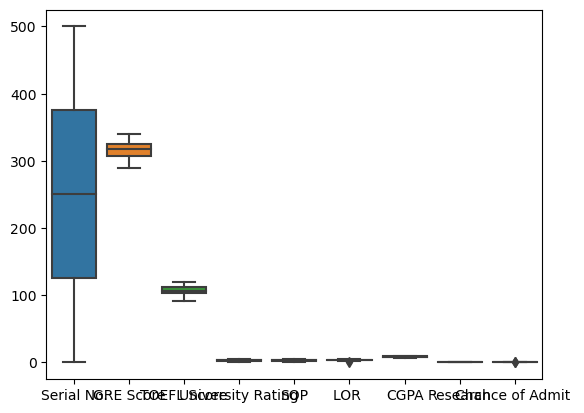

In [64]:
import seaborn as sns
sns.boxplot(data = new)

In [65]:
new.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Removing Irrelavent Variable

In [66]:
new.drop('Serial No.', axis =1, inplace =True)
new.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [67]:
new.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance_of_Admit'}, inplace=True)

In [68]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


### Checking Missing Value

In [69]:
# Do we have NA's in data
new.isna().sum()  ## is = check & as = convert

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [70]:
for i in new['Chance_of_Admit']:
    if i >= 0.80:
        new['Chance_of_Admit'].replace(i, 'High', inplace = True)
    else:
        new['Chance_of_Admit'].replace(i, 'Low', inplace = True)

In [71]:
new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,High
1,324,107,4,4.0,4.5,8.87,1,Low
2,316,104,3,3.0,3.5,8.00,1,Low
3,322,110,3,3.5,2.5,8.67,1,High
4,314,103,2,2.0,3.0,8.21,0,Low


# Breaking data in Quantitative Data and Qualitative Data

In [72]:
# #Employee Numeric columns
Quantitative_Data = new[new.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Data.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


### Taking subset data of Category 

In [84]:
Qualitative_Data = []

In [86]:
for i in new['Chance_of_Admit']:
    if i == 'High':
        Qualitative_Data.append(1)
    else:
         Qualitative_Data.append(0)

In [87]:
Qualitative_Data = pd.DataFrame(Qualitative_Data)
Qualitative_Data.head()

,0
0,1
1,0
2,0
3,1
4,0


In [89]:
Qualitative_Data.rename( columns={0 :'Chance_of_Admit'}, inplace=True )

### Combine to Dataset

In [90]:
final_combined = pd.concat([Quantitative_Data, Qualitative_Data],axis=1)

In [91]:
final_combined.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


# Step 3: Data Partition

In [132]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = final_combined.drop(['Chance_of_Admit'],axis=1)
y = final_combined[['Chance_of_Admit']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=43525)

# Step 4: Model Building

In [133]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

# Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [134]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
163,0,317,105,3,3.5,3.0,8.56,0
142,1,331,115,5,4.0,3.5,9.44,1
225,0,296,99,2,2.5,2.5,8.03,0
86,0,315,106,3,4.5,3.5,8.42,0
491,0,297,99,4,3.0,3.5,7.81,0


In [135]:
independent_variable = list(train.columns[1:])
independent_variable

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

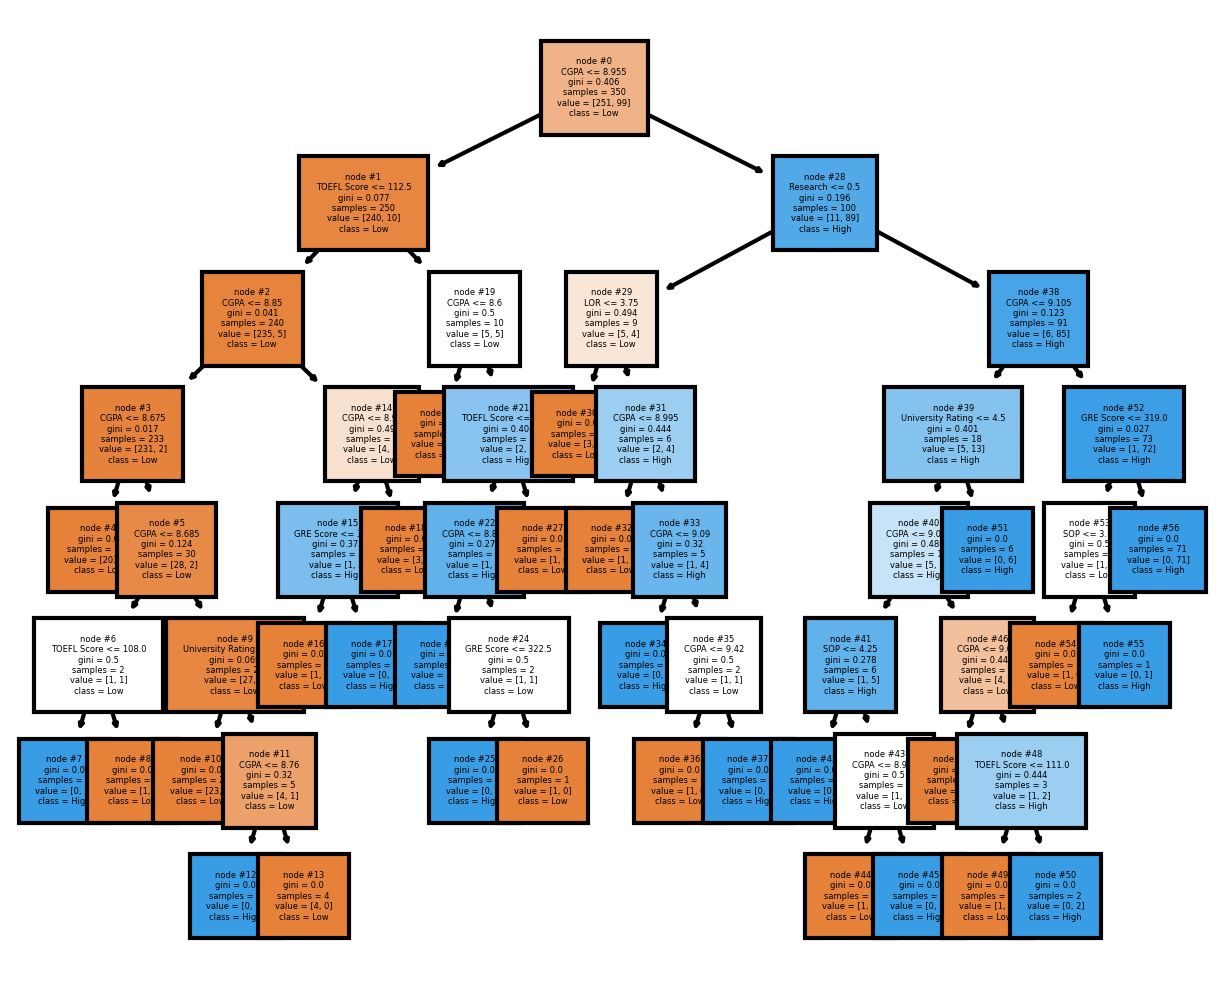

In [136]:
from sklearn import tree
import matplotlib.pyplot as plt

Chance_of_Admit=['Low', 'High']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Chance_of_Admit, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Step 6 : Predictions on Train Dataset

In [137]:
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
163,0,317,105,3,3.5,3.0,8.56,0
142,1,331,115,5,4.0,3.5,9.44,1
225,0,296,99,2,2.5,2.5,8.03,0
86,0,315,106,3,4.5,3.5,8.42,0
491,0,297,99,4,3.0,3.5,7.81,0


In [138]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted
163,0,317,105,3,3.5,3.0,8.56,0,0
142,1,331,115,5,4.0,3.5,9.44,1,1
225,0,296,99,2,2.5,2.5,8.03,0,0
86,0,315,106,3,4.5,3.5,8.42,0,0
491,0,297,99,4,3.0,3.5,7.81,0,0


# Step 7 : Model Performance Metrics

In [139]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Chance_of_Admit'])
print(matrix)

[[251   0]
 [  0  99]]


#### Final accuracy of Model Before Pruning 

In [140]:
Accuracy_Train=((251+99)/(350)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [141]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00        99

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



### Model Improvement by Pruning Method ( Cut Tree)

In [169]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter   # bydefault gini is assigned if not mentioned.
                                 min_samples_leaf=15, ## child
                                 min_samples_split=30, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=15, min_samples_split=30)

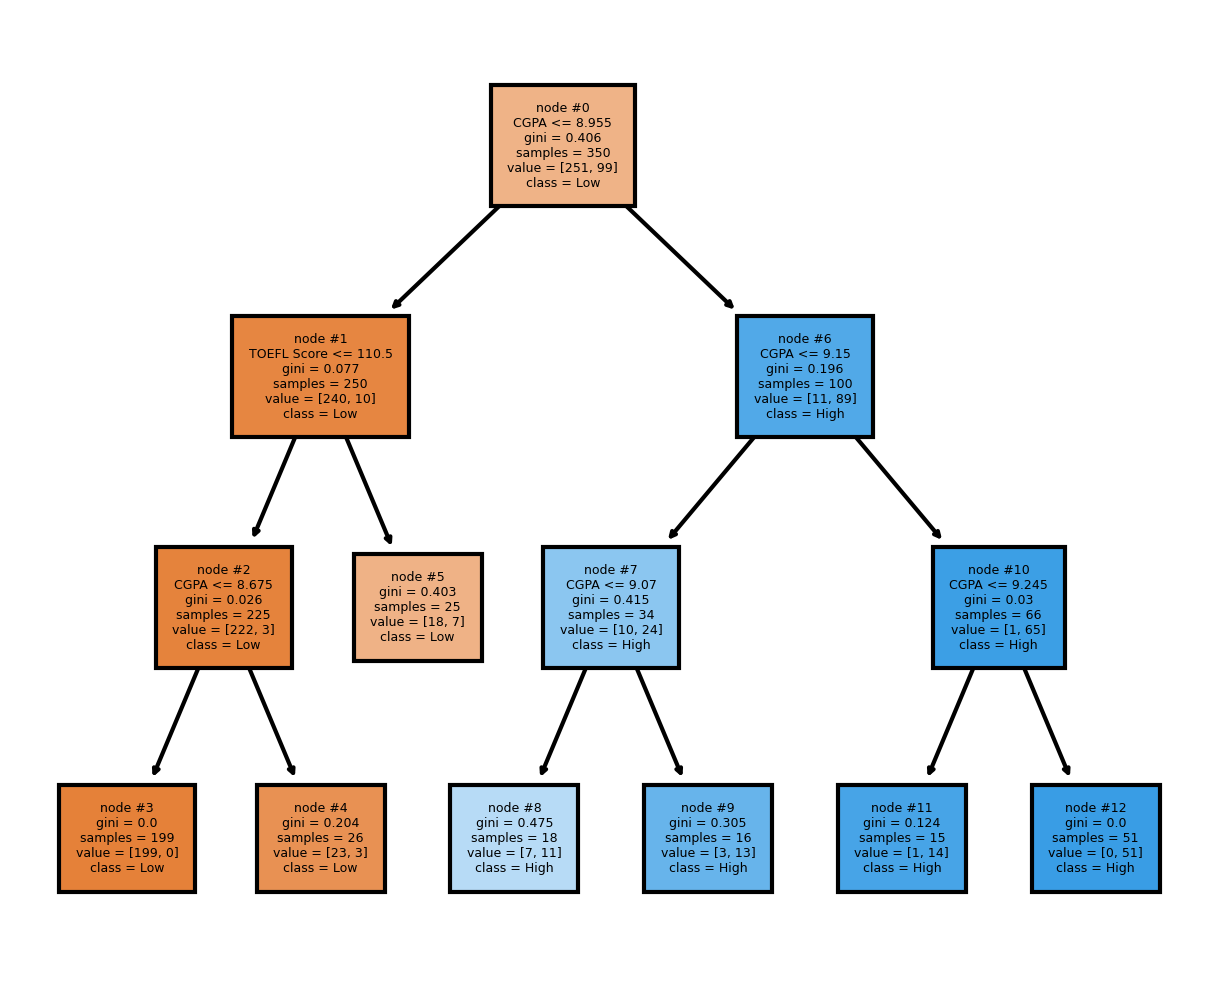

In [170]:
from sklearn import tree
import matplotlib.pyplot as plt

Chance_of_Admit=['Low', 'High']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Chance_of_Admit, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

### Strategy & Prediction
* Contract = Month-to-Month & Monthly Charges > 68 & Tenure <= 15.5 

In [171]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted
163,0,317,105,3,3.5,3.0,8.56,0,0
142,1,331,115,5,4.0,3.5,9.44,1,1
225,0,296,99,2,2.5,2.5,8.03,0,0
86,0,315,106,3,4.5,3.5,8.42,0,0
491,0,297,99,4,3.0,3.5,7.81,0,0


#### Final accuracy of Model after Pruning 

In [172]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Chance_of_Admit'])
print(matrix)

[[240  10]
 [ 11  89]]


In [173]:
Accuracy_Train=((240+89)/(350)*100)
print(Accuracy_Train)

94.0


In [174]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       251
           1       0.89      0.90      0.89        99

    accuracy                           0.94       350
   macro avg       0.93      0.93      0.93       350
weighted avg       0.94      0.94      0.94       350



# Step 8 : Predictions on Test Dataset

In [175]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
311,328,108,4,4.5,4.0,9.18,1,1
116,299,102,3,4.0,3.5,8.62,0,0
474,308,105,4,3.0,2.5,7.95,1,0
254,321,114,4,4.0,5.0,9.12,0,1
88,314,108,3,4.5,3.5,8.14,0,0


In [176]:
test['Predicted']=dt.predict(X_test)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
311,328,108,4,4.5,4.0,9.18,1,1,1
116,299,102,3,4.0,3.5,8.62,0,0,0
474,308,105,4,3.0,2.5,7.95,1,0,0
254,321,114,4,4.0,5.0,9.12,0,1,1
88,314,108,3,4.5,3.5,8.14,0,0,0


# Step 9 : Model Performance Metrics on Test data 

In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Chance_of_Admit'])
print(confusion_matrix)

[[86 11]
 [ 8 45]]


In [178]:
Accuracy_test=((86+45)/(150)*100)
Accuracy_test

87.33333333333333

# Sensitivity & Specificity

#### Train

In [179]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       251
           1       0.89      0.90      0.89        99

    accuracy                           0.94       350
   macro avg       0.93      0.93      0.93       350
weighted avg       0.94      0.94      0.94       350



#### Train :-

* 90% is accuracy of High chance of admit capture by model 
* 96% is accuracy of Low chance of admit capture by model 

#### Test

In [180]:
from sklearn.metrics import classification_report
print(classification_report(test['Chance_of_Admit'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        94
           1       0.85      0.80      0.83        56

    accuracy                           0.87       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.87      0.87      0.87       150



#### Test :-

* 80% is accuracy of High chance of admit capture by model 
* 91% is accuracy of Low chance of admit capture by model 

# Grid Search Method 

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [30, 40, 50, 60], ## Parent 
           'min_samples_leaf': [5, 10, 15, 20], ## Child or Leave 
           'max_depth':[3, 4, 5, 6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [30, 40, 50, 60]},
             verbose=1)

100,50,3  # first Combination
100,50,4  # Second Combination
100,50,6 # Third Combination
100,70,3 
100,70,4
100,70,6
150,30,4
150,30,5
150,30,6
150,50,4
150,50,5
150,50,6

In [182]:
grid_search_cv.best_estimator_ 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=15, min_samples_split=30,
                       random_state=42)